# Tilt / Focus Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from poke.poke_core import Rayfront
import zosapi
zos = zosapi.App()

In [2]:
# simulation params
nrays = 100
wvl = 1.65e-6
D_tel = 2.4
wo = 0.018 / 1


# GBD only cares about first and last surface
m1 = {'surf':1,'coating':1,'mode':'reflect'}
m2 = {'surf':8,'coating':1,'mode':'reflect'}
surflist = [m1,m2]

rf = Rayfront(nrays,wvl,D_tel/2,max_fov=0.08,circle=True,waist_pad=wo,grid='even')
rf.as_gaussianbeamlets(wo)
rf.surfaces = surflist
rf.trace_rayset('C:/Users/UASAL-OPTICS/Desktop/poke/experiments/weber/Hubble_Test_defocus.zmx')

norm fov =  [0. 0.]
base ray shape  (4, 7628)
5 Raysets traced through 2 surfaces


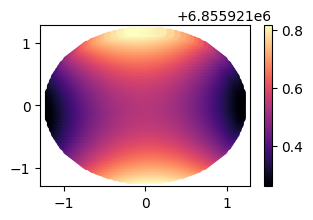

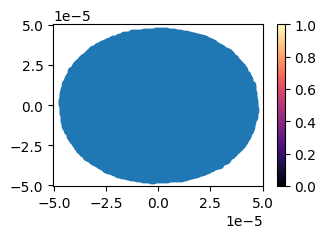

In [3]:
plt.figure()
plt.scatter(rf.xData[0][0],rf.yData[0][0],c=rf.opd[0,-1]/wvl)
plt.colorbar()
plt.show()

plt.figure()
plt.scatter(rf.xData[0][-1],rf.yData[0][-1])
plt.colorbar()
plt.show()
# 0.00760

In [4]:
# config detector
d_diam = 889.04e-6 # * 1e2
x = np.linspace(-d_diam/2,d_diam/2,128)
x,y = np.meshgrid(x,x)

dcoords = np.array([x.ravel(),y.ravel(),np.zeros_like(x.ravel())]) 
psf = rf.beamlet_decomposition_field(dcoords,memory_avail=4,vignette=False,misaligned=True)

pixels =  16384
rays =  7628
beamlet field at wavelength = 1.65e-06
computeunit =  1907
override nloops =  4
(3, 16384)
(3,)
centroid at =  [-9.16824553e-19 -1.58826806e-18  0.00000000e+00]
centroid offset applied
loop 0 completed, time elapsed = 3.1085925000000003
loop 1 completed, time elapsed = 6.325492499999999
loop 2 completed, time elapsed = 9.5221791
loop 3 completed, time elapsed = 12.5929989


In [5]:
zmx_psf = np.genfromtxt('C:/Users/UASAL-OPTICS/Desktop/poke/experiments/weber/tilted_psf_test_wl165um_dx6949.txt',skip_header=18,encoding='UTF-16')

# grab the inner
zmx_psf = zmx_psf[256-64:256+64,256-64:256+64]
zmx_psf /= np.max(zmx_psf)
zmx_psf = np.flipud(zmx_psf)

gbd_psf = np.abs(psf.reshape([128,128]))**2
gbd_psf /= np.max(gbd_psf)

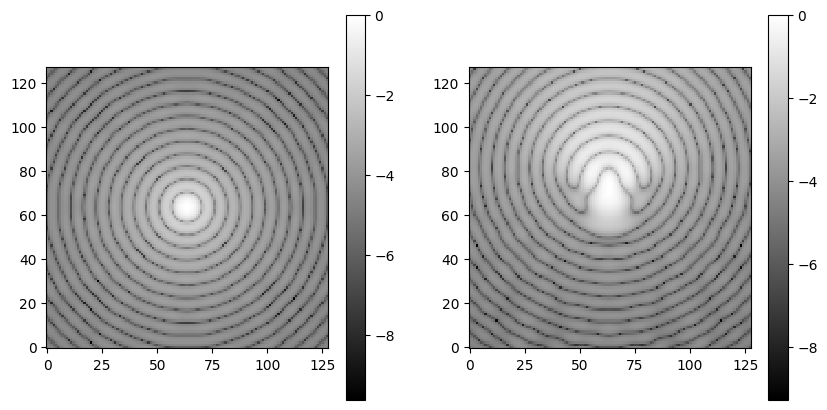

In [6]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.imshow(np.log10(gbd_psf),cmap='gray')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.log10(zmx_psf),cmap='gray')
plt.colorbar()
plt.show()

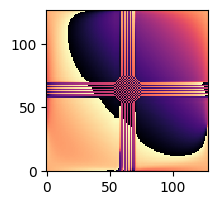

In [7]:
img_field = psf.reshape([128,128])
pupil_field = np.fft.fftshift(np.fft.fft2(img_field,norm='ortho'))
plt.imshow(np.angle(pupil_field))

In [8]:
def img_defocus_to_distance(fno=57.6/2.4,wavelength=1.65e-6,W020=1):
    return 8 * fno**2 * wavelength * W020

def compute_wo(nrays=200,OF=1.5,D=2.4):
    return OF * D / nrays / 2

print(img_defocus_to_distance())
print(compute_wo())

0.0076032
0.009
